In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"/content/vehicle insurance.csv")

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [2]:
df.shape

(460427, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460427 entries, 0 to 460426
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    460427 non-null  int64  
 1   Gender                460427 non-null  object 
 2   Age                   460427 non-null  int64  
 3   Driving_License       460427 non-null  int64  
 4   Region_Code           460427 non-null  float64
 5   Previously_Insured    460427 non-null  int64  
 6   Vehicle_Age           460427 non-null  object 
 7   Vehicle_Damage        460427 non-null  object 
 8   Annual_Premium        460427 non-null  float64
 9   Policy_Sales_Channel  460427 non-null  float64
 10  Vintage               460427 non-null  int64  
 11  Response              460427 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 42.2+ MB


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,460427.000000,460427.000000,460427.000000,460427.000000,460427.000000,460427.000000,460427.000000,460427.000000,460427.000000
mean,234325.116381,38.539210,0.998067,26.402544,0.489137,30710.552442,111.948891,154.297854,0.163802
std,139482.954692,15.225135,0.043923,13.175887,0.499883,17058.618703,54.283653,83.691475,0.370096
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115107.500000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,82.000000,0.000000
50%,230214.000000,36.000000,1.000000,28.000000,0.000000,31699.000000,145.000000,154.000000,0.000000
75%,345320.500000,49.000000,1.000000,35.000000,1.000000,39452.000000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
# Check for missing values
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [6]:
#Outliers Removal

q1 = np.quantile(df.Annual_Premium, 0.25)
q3 = np.quantile(df.Annual_Premium, 0.75)
iqr = q3 - q1

outliers = df[(df.Annual_Premium < q1 - 1.5 * iqr) | (df.Annual_Premium > q3 + 1.5 * iqr)]
df_new = df[(df.Annual_Premium > q1 - 1.5 * iqr) & (df.Annual_Premium < q3 + 1.5 * iqr)]

# pd.DataFrame outlier counts
pd.DataFrame({
    "New Data": [len(df_new[df_new.Response == 0]), len(df_new[df_new.Response == 1])],
    "Outliers": [len(outliers[outliers.Response == 0]), len(outliers[outliers.Response == 1])]
})

,New Data,Outliers
0,375017,9991
1,72889,2530


In [7]:
# Ensure df_new is an independent copy of the original DataFrame
df_new1 = df_new.copy()

# Replace Gender values
df_new.loc[df_new['Gender'] == 'Female', 'Gender'] = 0
df_new.loc[df_new['Gender'] == 'Male', 'Gender'] = 1
df_new['Gender'] = df_new['Gender'].astype(int)

# Replace Vehicle_Age values
df_new.loc[df_new['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0
df_new.loc[df_new['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
df_new.loc[df_new['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
df_new['Vehicle_Age'] = df_new['Vehicle_Age'].astype(int)

# Replace Vehicle_Damage values
df_new.loc[df_new['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
df_new.loc[df_new['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
df_new['Vehicle_Damage'] = df_new['Vehicle_Damage'].astype(int)

In [8]:
# dropping the 'id' column as there is no use of it
df_new.drop('id', axis=1, inplace=True)

In [9]:
df_new.dtypes

,0
Gender,int64
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,int64
Vehicle_Damage,int64
Annual_Premium,float64
Policy_Sales_Channel,float64
Vintage,int64


In [10]:
#Value Counts of Target Variale

value_count = df_new.Response.value_counts()
print('Class 0:', value_count[0])
print('Class 1:', value_count[1])
print('Proportion:', round(value_count[0] / value_count[1],2), ': 1')
print('Total Response:', len(value_count))

Class 0: 375017
Class 1: 72889
Proportion: 5.15 : 1
Total Response: 2


# **EDA**

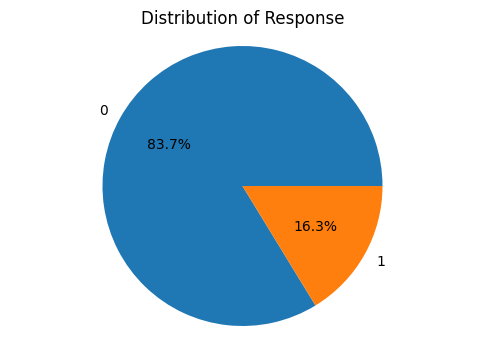

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target Class Distribution Percentages

# Calculate percentages
response_counts = df_new["Response"].value_counts(normalize=True) * 100

# Create the pie chart
plt.figure(figsize=(6, 4))
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Response")
plt.axis('equal')
plt.show()


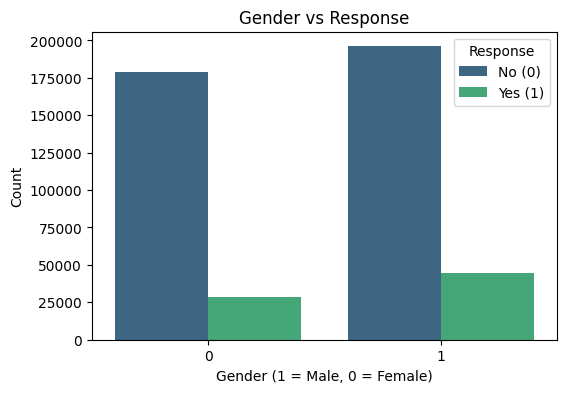

In [12]:
# Bar chart of Gender vs Response
plt.figure(figsize=(6, 4))
sns.countplot(data=df_new, x='Gender', hue='Response', palette='viridis')
plt.title('Gender vs Response')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.legend(title='Response', labels=['No (0)', 'Yes (1)'])
plt.show()


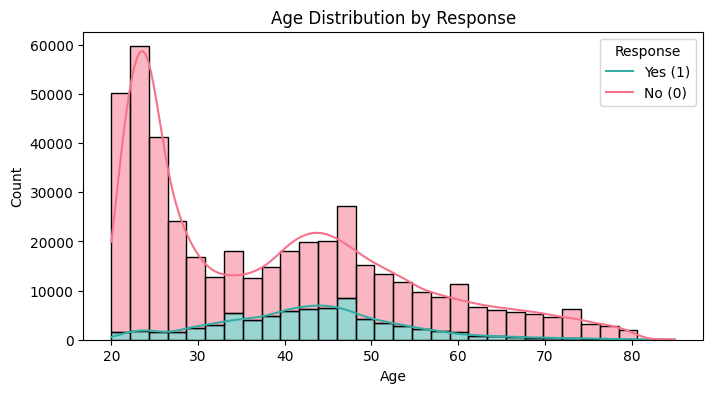

In [13]:
#Age Distribution by Response
plt.figure(figsize=(8, 4))
sns.histplot(data=df_new, x='Age', hue='Response', kde=True, palette='husl', bins=30, multiple='stack')
plt.title('Age Distribution by Response')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Yes (1)', 'No (0)'])
plt.show()


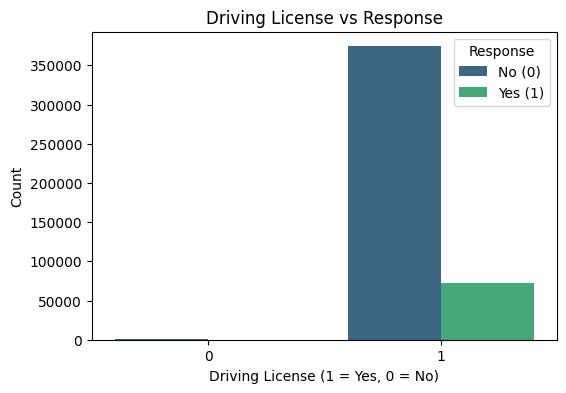

In [14]:
# Bar chart of Driving_License vs Response
plt.figure(figsize=(6, 4))
sns.countplot(data=df_new, x='Driving_License', hue='Response', palette='viridis')
plt.title('Driving License vs Response')
plt.xlabel('Driving License (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Response', labels=['No (0)', 'Yes (1)'])
plt.show()


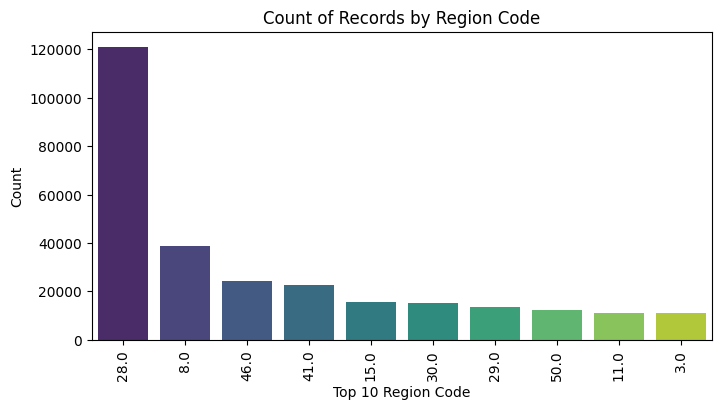

In [15]:
# Bar Chart of Top 10 Region Codes by Count
plt.figure(figsize=(8, 4))
sns.countplot(data=df_new, x='Region_Code', palette='viridis', order=df_new['Region_Code'].value_counts().index[:10])
plt.title('Count of Records by Region Code')
plt.xlabel('Top 10 Region Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


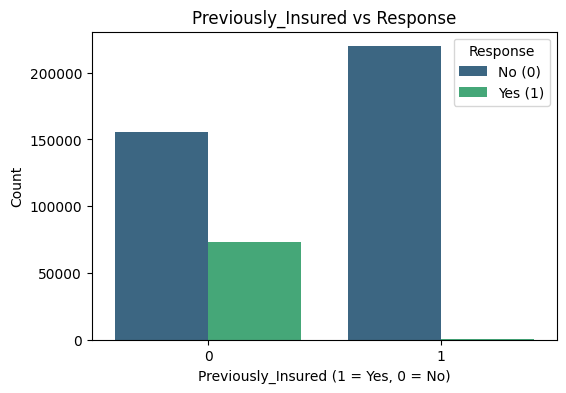

In [16]:
# Bar chart of Previously_Insured vs Response
plt.figure(figsize=(6, 4))
sns.countplot(data=df_new, x='Previously_Insured', hue='Response', palette='viridis')
plt.title('Previously_Insured vs Response')
plt.xlabel('Previously_Insured (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Response', labels=['No (0)', 'Yes (1)'])
plt.show()

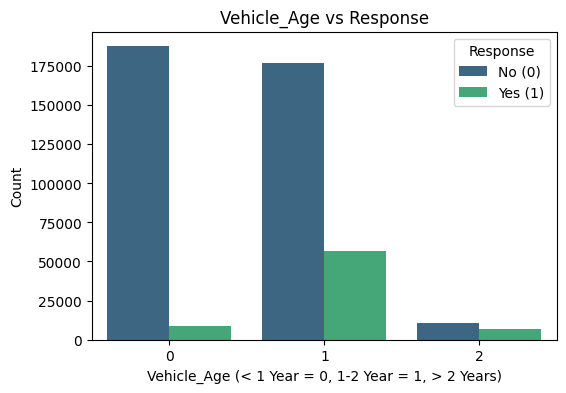

In [17]:
# Bar chart of Vehicle_Age vs Response
plt.figure(figsize=(6, 4))
sns.countplot(data=df_new, x='Vehicle_Age', hue='Response', palette='viridis')
plt.title('Vehicle_Age vs Response')
plt.xlabel('Vehicle_Age (< 1 Year = 0, 1-2 Year = 1, > 2 Years)')
plt.ylabel('Count')
plt.legend(title='Response', labels=['No (0)', 'Yes (1)'])
plt.show()

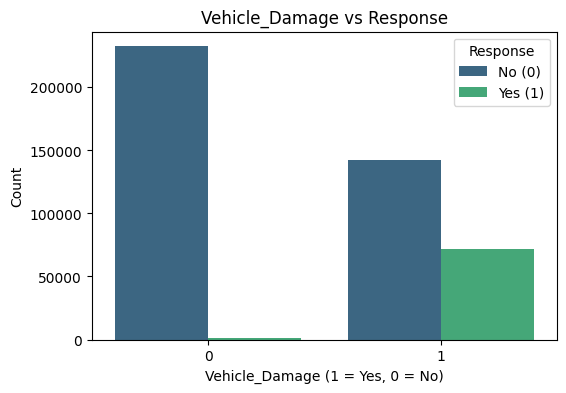

In [18]:
# Bar chart of Vehicle_Damage vs Response
plt.figure(figsize=(6, 4))
sns.countplot(data=df_new, x='Vehicle_Damage', hue='Response', palette='viridis')
plt.title('Vehicle_Damage vs Response')
plt.xlabel('Vehicle_Damage (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Response', labels=['No (0)', 'Yes (1)'])
plt.show()

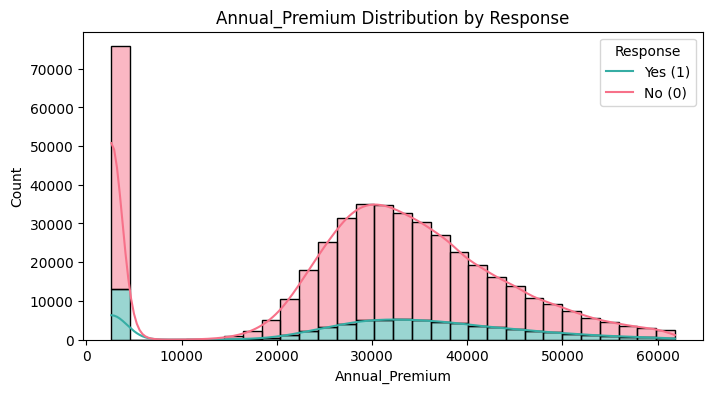

In [19]:
# Annual_Premium Distribution by Response
plt.figure(figsize=(8, 4))
sns.histplot(data=df_new, x='Annual_Premium', hue='Response', kde=True, palette='husl', bins=30, multiple='stack')
plt.title('Annual_Premium Distribution by Response')
plt.xlabel('Annual_Premium')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Yes (1)', 'No (0)'])
plt.show()


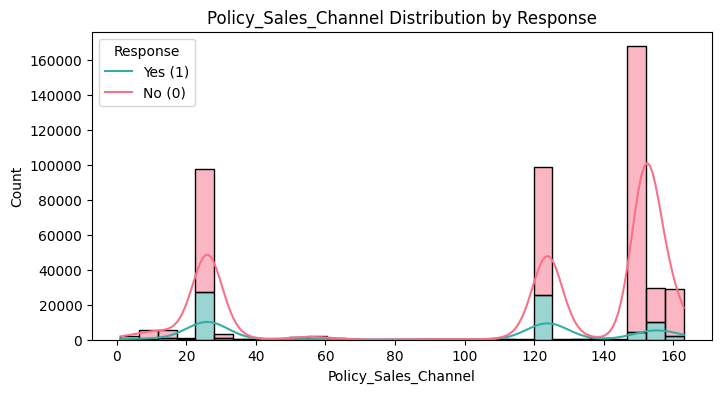

In [20]:
# Policy_Sales_Channel Distribution by Response
plt.figure(figsize=(8, 4))
sns.histplot(data=df_new, x='Policy_Sales_Channel', hue='Response', kde=True, palette='husl', bins=30, multiple='stack')
plt.title('Policy_Sales_Channel Distribution by Response')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Yes (1)', 'No (0)'])
plt.show()


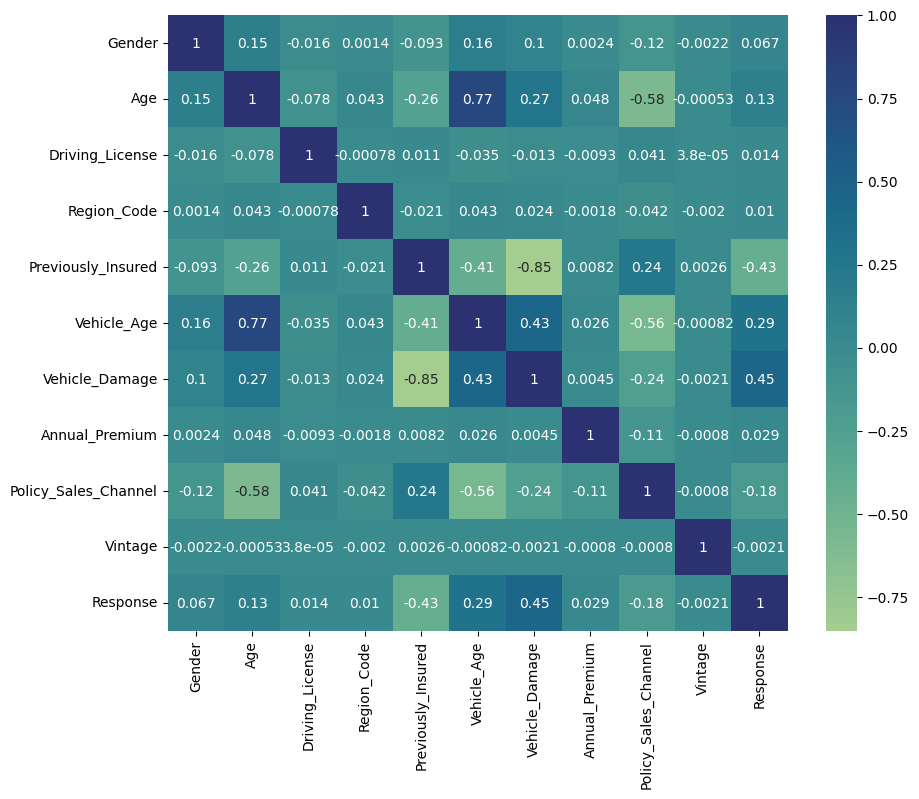

In [21]:
# heatmap of correlations between numeric columns

plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(), annot=True, cmap='crest')
plt.show()

In [ ]:
# saving the prepreocessed dataset
df_new.to_csv('vehicle insurance preprocessed.csv', index=False)